In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import json
import requests
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [30]:
%store -r pass_list
pass_list.remove('const')

We will feature select and try to meet assumptions for our trained dataset before running the model again.

In [31]:
pass_list

['date',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'reno_2000_over',
 'reno_1980_2000',
 'wat_1.0',
 'con_2',
 'con_3',
 'con_4',
 'con_5',
 'gra_11',
 'gra_12',
 'gra_13',
 'flo_2.0',
 'flo_2.5',
 'flo_3.0',
 'bed_4',
 'bed_5',
 'bed_6',
 'bed_7',
 'bed_9',
 'bed_10',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 '

In [16]:
continuous = ['date', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 
              'sqft_living15', 'sqft_lot15']

In [10]:
data = pd.read_csv("data/df_joined.csv")
df = pd.DataFrame(data)

In [11]:
y = df.price
X = df.drop(columns = "price", axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
X_train

,id,date,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
11787,2781250400,735514,2.50,1770,4950,1770,0.0,2003,47.3497,-122.025,...,0,0,0,0,0,0,0,0,0,0
12884,8946400210,735387,2.50,2110,4099,2110,0.0,2001,47.7508,-122.170,...,0,0,0,0,0,0,0,0,0,0
16243,9106000050,735527,3.00,2170,2500,1710,460.0,1997,47.6742,-122.303,...,0,0,0,0,0,0,0,0,0,0
3972,7980900011,735715,2.00,1910,13505,1910,0.0,1955,47.7114,-122.230,...,0,0,0,0,0,0,0,0,0,0
13580,7504400120,735495,1.75,2570,12039,1910,660.0,1978,47.6260,-122.048,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1518000070,735556,2.50,1810,3192,1070,740.0,2001,47.7364,-121.969,...,0,0,0,0,0,0,0,0,0,0
17289,333100209,735675,1.75,2330,16300,2330,0.0,1964,47.7037,-122.240,...,0,0,0,0,0,0,0,0,0,0
5192,6855700080,735428,1.00,1240,8840,1240,0.0,1952,47.7277,-122.308,...,0,0,0,0,0,0,0,0,0,0
12172,8081650400,735408,2.75,2000,5827,2000,0.0,1997,47.3629,-122.026,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y_train.head()

11787    350500.0
12884    548000.0
16243    767250.0
3972     412450.0
13580    495000.0
Name: price, dtype: float64

In [43]:
new_train = pd.concat([X_train[pass_list],y_train], axis=1) #only select features with significant p-values from pass_list

In [44]:
new_train.head()

,date,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,price
11787,735514,2.50,1770,4950,1770,0.0,2003,47.3497,-122.025,1770,...,0,0,0,0,0,0,0,0,0,350500.0
12884,735387,2.50,2110,4099,2110,0.0,2001,47.7508,-122.170,2110,...,0,0,0,0,0,0,0,0,0,548000.0
16243,735527,3.00,2170,2500,1710,460.0,1997,47.6742,-122.303,2170,...,0,0,0,0,0,0,0,0,0,767250.0
3972,735715,2.00,1910,13505,1910,0.0,1955,47.7114,-122.230,2010,...,0,0,0,0,0,0,0,0,0,412450.0
13580,735495,1.75,2570,12039,1910,660.0,1978,47.6260,-122.048,2200,...,0,0,0,0,0,0,0,0,0,495000.0


In [45]:
correlation_df = new_train.corr()

In [46]:
correlation_df.applymap(lambda val: abs(val) >= 0.75)
corr_data = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:10]

,level_0,level_1,0
724,sqft_above,sqft_living,0.876678
486,sqft_living,sqft_above,0.876678
2663,con_3,con_4,0.812289
2782,con_4,con_3,0.812289
1324,sqft_living15,sqft_living,0.756389
491,sqft_living,sqft_living15,0.756389
483,sqft_living,bathrooms,0.755278
364,bathrooms,sqft_living,0.755278
731,sqft_above,sqft_living15,0.731016
1326,sqft_living15,sqft_above,0.731016


sqft_living appears to be the addition of sqft_above and sqft_basement. Since sqft_living and sqft_above are highly correlated we will choose to drop sqft_living.  Condition 3 and Condition 4 also appear to be highly correlated so we will drop con_3. 

In [48]:
new_train.drop(columns = ['sqft_living', 'con_3'], inplace=True)

In [51]:
continuous.remove('sqft_living')

looking at normality of continuous variables before considering log transforming

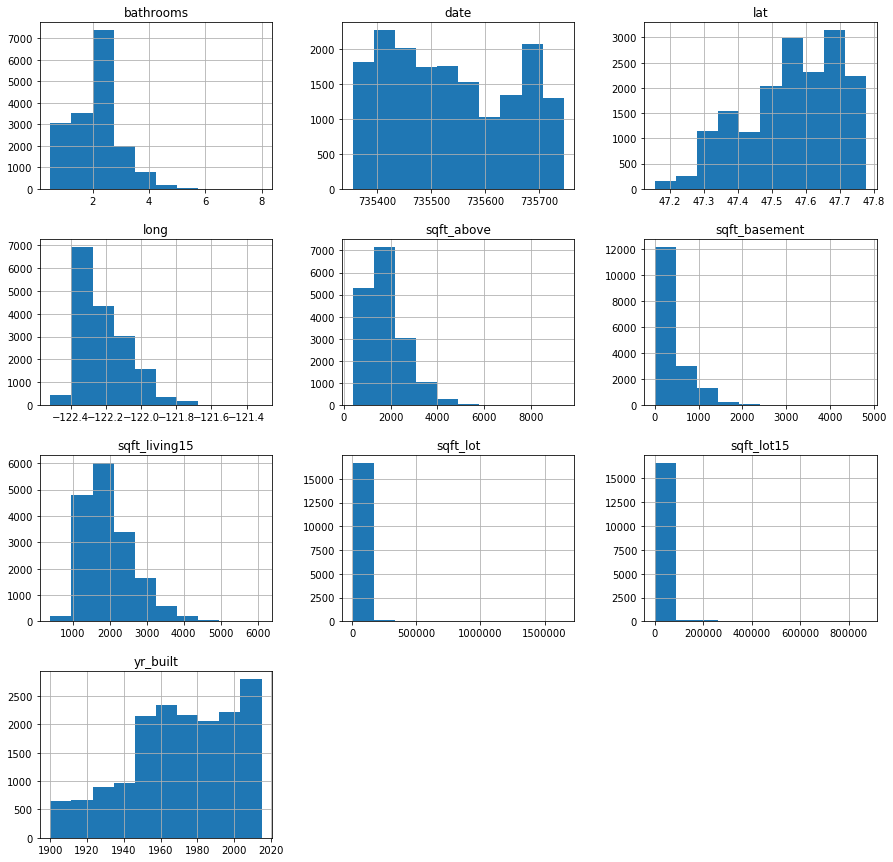

In [52]:
new_train[continuous].hist(figsize=[15,15]);

In [53]:
new_train['sqft_basement'] #sqft_basement is highly zero weighted so we will drop this feature

11787      0.0
12884      0.0
16243    460.0
3972       0.0
13580    660.0
         ...  
10955    740.0
17289      0.0
5192       0.0
12172      0.0
235        0.0
Name: sqft_basement, Length: 16914, dtype: float64

In [59]:
new_train.drop(columns = 'sqft_basement', inplace=True)

In [60]:
continuous.remove('sqft_basement')

In [57]:
new_train[new_train['sqft_lot15']==0] #sqft_lot and sqft_lot15 look zero-weighted but aren't actually.  Problem may be outliers.

,date,bathrooms,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,price


In [68]:
new_train.drop(columns = 'long', inplace=True) # removing longitude because of negative values
continuous.remove('long')

In [70]:
log_names = [f'{column}_log' for column in new_train[continuous].columns]
df_log = np.log(new_train[continuous])
df_log.columns=log_names
df_log

,date_log,bathrooms_log,sqft_lot_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log,sqft_lot15_log
11787,13.508325,0.916291,8.507143,7.478735,7.602401,3.857560,7.478735,8.411833
12884,13.508152,0.916291,8.318498,7.654443,7.601402,3.865996,7.654443,8.491055
16243,13.508343,1.098612,7.824046,7.444249,7.599401,3.864390,7.682482,8.313852
3972,13.508598,0.693147,9.510815,7.554859,7.578145,3.865170,7.605890,8.987197
13580,13.508299,0.559616,9.395907,7.554859,7.589842,3.863379,7.696213,9.424161
...,...,...,...,...,...,...,...,...
10955,13.508382,0.916291,8.068403,6.975414,7.601402,3.865694,7.461640,8.221479
17289,13.508544,0.559616,9.698920,7.753624,7.582738,3.865009,7.753624,9.698920
5192,13.508208,0.000000,9.087042,7.122867,7.576610,3.865512,7.130899,9.087042
12172,13.508181,1.011601,8.670258,7.600902,7.599401,3.857839,7.444249,8.843471


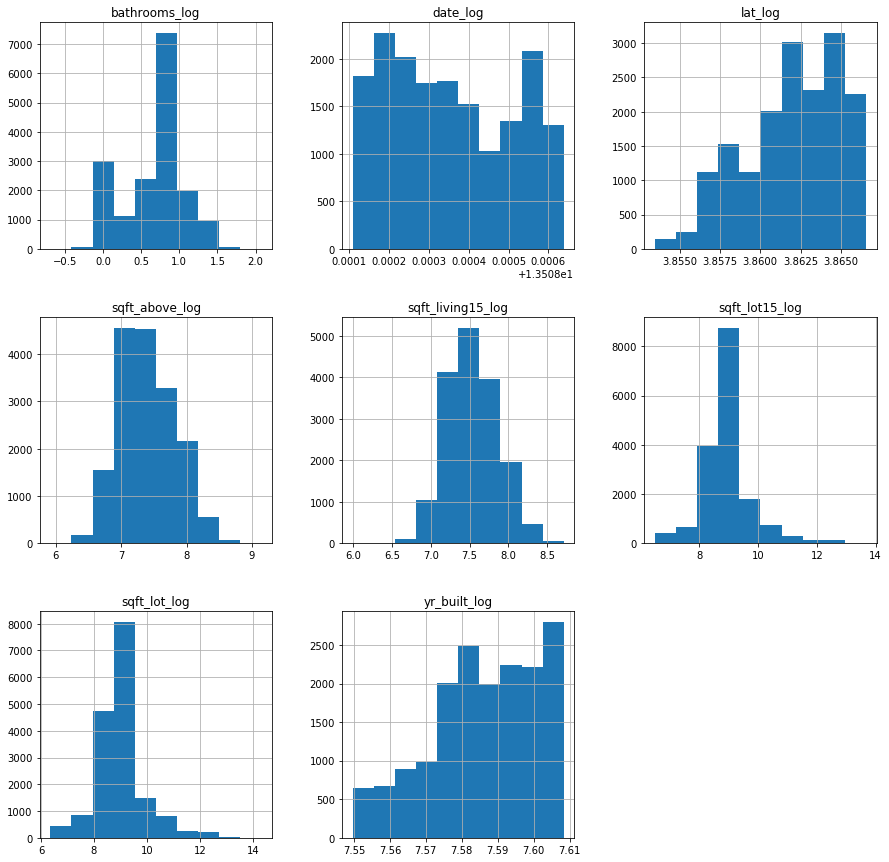

In [72]:
df_log.hist(figsize=[15,15]);

In [74]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)
df_log_norm

,date_log,bathrooms_log,sqft_lot_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log,sqft_lot15_log
11787,-0.191201,0.607304,-0.540011,0.192179,1.087822,-1.507335,-0.186324,-0.679785
12884,-1.314904,0.607304,-0.749010,0.602774,1.020658,1.371321,0.351664,-0.582321
16243,-0.076187,1.072850,-1.296812,0.111591,0.886130,0.823443,0.437515,-0.800327
3972,1.586862,0.037521,0.571954,0.370065,-0.542914,1.089624,0.203003,0.028066
13580,-0.359301,-0.303442,0.444647,0.370065,0.243417,0.478243,0.479555,0.565648
...,...,...,...,...,...,...,...,...
10955,0.180375,0.607304,-1.026090,-0.983982,1.020658,1.268393,-0.238664,-0.913971
17289,1.233058,-0.303442,0.780355,0.834539,-0.234123,1.034544,0.655337,0.903676
5192,-0.952112,-1.732385,0.102457,-0.639414,-0.646161,1.206192,-1.251336,0.150903
12172,-1.129081,0.850672,-0.359297,0.477660,0.886130,-1.412213,-0.291914,-0.148755


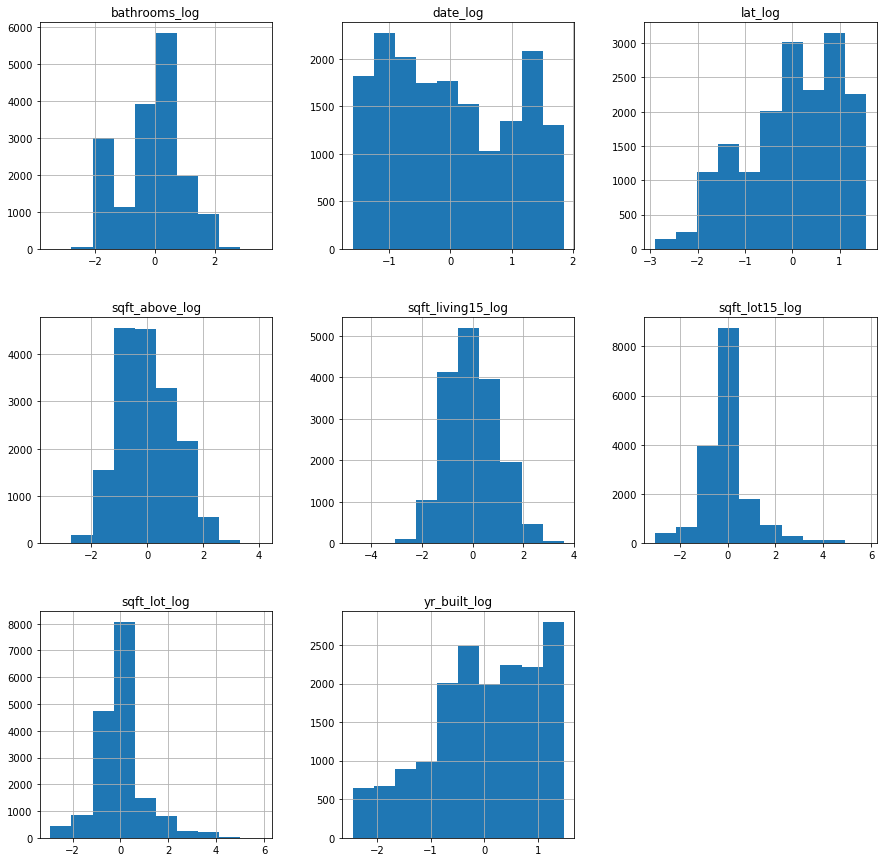

In [77]:
df_log_norm.hist(figsize=[15,15]);

Now we will log and normalize our dependent variable Price

In [79]:
y_train_log = np.log(y_train)
y_train_log

11787    12.767116
12884    13.214031
16243    13.550568
3972     12.929870
13580    13.112313
           ...    
10955    12.779873
17289    13.444447
5192     12.594561
12172    12.371587
235      13.028053
Name: price, Length: 16914, dtype: float64

In [80]:
y_train_log_norm = normalize(y_train_log)
y_train_log_norm

11787   -0.533682
12884    0.319320
16243    0.961650
3972    -0.223041
13580    0.125177
           ...   
10955   -0.509333
17289    0.759102
5192    -0.863027
12172   -1.288606
235     -0.035646
Name: price, Length: 16914, dtype: float64

In [92]:
#append price to continuous then drop
new_cat = new_train.drop(columns = continuous)
new_cat

,reno_2000_over,reno_1980_2000,wat_1.0,con_2,con_4,con_5,gra_11,gra_12,gra_13,flo_2.0,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
11787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12884,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16243,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17289,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5192,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12172,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
trained2_df = pd.concat([df_log_norm,new_cat],axis=1)

In [94]:
trained2_df

,date_log,bathrooms_log,sqft_lot_log,sqft_above_log,yr_built_log,lat_log,sqft_living15_log,sqft_lot15_log,reno_2000_over,reno_1980_2000,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
11787,-0.191201,0.607304,-0.540011,0.192179,1.087822,-1.507335,-0.186324,-0.679785,0,0,...,0,0,0,0,0,0,0,0,0,0
12884,-1.314904,0.607304,-0.749010,0.602774,1.020658,1.371321,0.351664,-0.582321,0,0,...,0,0,0,0,0,0,0,0,0,0
16243,-0.076187,1.072850,-1.296812,0.111591,0.886130,0.823443,0.437515,-0.800327,0,0,...,0,0,0,0,0,0,0,0,0,0
3972,1.586862,0.037521,0.571954,0.370065,-0.542914,1.089624,0.203003,0.028066,0,0,...,0,0,0,0,0,0,0,0,0,0
13580,-0.359301,-0.303442,0.444647,0.370065,0.243417,0.478243,0.479555,0.565648,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.180375,0.607304,-1.026090,-0.983982,1.020658,1.268393,-0.238664,-0.913971,0,0,...,0,0,0,0,0,0,0,0,0,0
17289,1.233058,-0.303442,0.780355,0.834539,-0.234123,1.034544,0.655337,0.903676,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,-0.952112,-1.732385,0.102457,-0.639414,-0.646161,1.206192,-1.251336,0.150903,0,0,...,1,0,0,0,0,0,0,0,0,0
12172,-1.129081,0.850672,-0.359297,0.477660,0.886130,-1.412213,-0.291914,-0.148755,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X_int = sm.add_constant(trained2_df)
model = sm.OLS(y_train ,X_int).fit()
summary = model.summary()
summary

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     734.0
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:21:02   Log-Likelihood:            -2.2764e+05
No. Observations:               16914   AIC:                         4.554e+05
Df Residuals:                   16831   BIC:                         4.561e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.856e+05   8707.197     44.285      0.000    3.69e+05    4.03e+05
date_log           1.184e+04   1312.155      9.020      0.000    9264.168    1.44e+04
bathrooms_log      3.464e+04   2134.226     16.233      0.000    3.05e+04    3.88e+04
sqft_lot_log       4.484e+04   3456.912     12.971      0.000    3.81e+04    5.16e+04
sqft_above_log     1.077e+05   2605.490     41.337      0.000    1.03e+05    1.13e+05
yr_built_log       4954.5384   2299.086      2.155      0.031     448.089    9460.988
lat_log             5.99e+04   5913.095     10.131      0.000    4.83e+04    7.15e+04
sqft_living15_log  5.178e+04   2135.085     24.252      0.000    4.76e+04     5.6e+04
sqft_lot15_log    -9364.2630   3421.839     -2.737      0.006   -1.61e+04   -2657.099
reno_2000_over     1.297e+05   1.02e+04     12.713      0.000     1.1e+05     1.5e+05
reno_1980_2000     4.331e+04   1.23e+04      3.527      0.000    1.92e+04    6.74e+04
wat_1.0            8.487e+05   1.68e+04     50.488      0.000    8.16e+05    8.82e+05
con_2             -6870.5045   1.54e+04     -0.446      0.655    -3.7e+04    2.33e+04
con_4              2.265e+04   3396.754      6.669      0.000     1.6e+04    2.93e+04
con_5              8.578e+04   5370.263     15.972      0.000    7.52e+04    9.63e+04
gra_11             4.292e+05   1.04e+04     41.313      0.000    4.09e+05     4.5e+05
gra_12               8.5e+05   2.12e+04     40.174      0.000    8.08e+05    8.91e+05
gra_13             2.283e+06   4.79e+04     47.651      0.000    2.19e+06    2.38e+06
flo_2.0           -2.755e+04   4267.547     -6.456      0.000   -3.59e+04   -1.92e+04
flo_2.5            9.978e+04   1.61e+04      6.183      0.000    6.81e+04    1.31e+05
flo_3.0           -6.334e+04   9865.231     -6.421      0.000   -8.27e+04    -4.4e+04
bed_4             -4787.5541   3295.977     -1.453      0.146   -1.12e+04    1672.908
bed_5              2.594e+04   5553.439      4.672      0.000    1.51e+04    3.68e+04
bed_6               1.35e+04   1.24e+04      1.086      0.277   -1.09e+04    3.79e+04
bed_7               -2.5e+04   3.31e+04     -0.756      0.449   -8.98e+04    3.98e+04
bed_9             -2.756e+05   7.67e+04     -3.595      0.000   -4.26e+05   -1.25e+05
bed_10            -1.812e+05    1.2e+05     -1.506      0.132   -4.17e+05    5.46e+04
zip_98004          7.172e+05   1.55e+04     46.255      0.000    6.87e+05    7.48e+05
zip_98005          1.995e+05   1.81e+04     10.994      0.000    1.64e+05    2.35e+05
zip_98006          2.184e+05   1.23e+04     17.745      0.000    1.94e+05    2.42e+05
zip_98007          1.502e+05   1.97e+04      7.612      0.000    1.11e+05    1.89e+05
zip_98008          1.757e+05   1.57e+04     11.179      0.000    1.45e+05    2.06e+05
zip_98010          5.359e+04   1.96e+04      2.739      0.006    1.52e+04

In [98]:
y_hat = model.predict()
train_rmse = mean_squared_error(y_train,y_hat)**.5
train_rmse

169322.51451472283